In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
from geopy.geocoders import Nominatim
import matplotlib
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns

sns.set_palette("husl")

%matplotlib inline

In [2]:
tweets = pd.read_csv("tweets_with_clean_location.csv")
tweets.head()

,Unnamed: 0,id,keyword,location,text,target,address_latitude_longitude,city,country,latitude,longitude
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029


In [3]:
tweets = tweets.dropna()
tweets = tweets.drop_duplicates()

## Proceso para obtener la latitud, longitud y dirección en case a su locación

In [4]:
"""geolocator = Nominatim(user_agent="orga_datos")
def getGeoData(x):
    l = geolocator.geocode(x, timeout=20)
    if l == None:
        return (None, None, None)
    return (l.address, l.latitude, l.longitude)

tweets["address_latitude_longitude"] = tweets.location.transform(lambda x: getGeoData(x))
tweets.head()"""

'geolocator = Nominatim(user_agent="orga_datos")\ndef getGeoData(x):\n    l = geolocator.geocode(x, timeout=20)\n    if l == None:\n        return (None, None, None)\n    return (l.address, l.latitude, l.longitude)\n\ntweets["address_latitude_longitude"] = tweets.location.transform(lambda x: getGeoData(x))\ntweets.head()'

## Creación de columna latitud y longitud en el dataframe original

In [5]:
"""tweets["latitude"] = tweets.address_latitude_longitude.transform(lambda x: x[1])
tweets["longitude"] = tweets.address_latitude_longitude.transform(lambda x: x[2])"""

'tweets["latitude"] = tweets.address_latitude_longitude.transform(lambda x: x[1])\ntweets["longitude"] = tweets.address_latitude_longitude.transform(lambda x: x[2])'

## Proceso para separar la dirección obtenida de la API en dos columnas: ciudad y país

In [6]:
"""def getCleanLocation(x):
    if x[0] == None and x[1] == None and x[2] == None:
        return (None, None)
    
    splittedAddress = x[0].split(",")
    
    if 0 <= len(splittedAddress) <= 1:
        return (None, None)
    
    return (splittedAddress[0], splittedAddress[-1])
    
tweets["city"] = ""
tweets["country"] = ""

for index, row in tweets.iterrows():
    cleanLocation = getCleanLocation(row.address_latitude_longitude)
    tweets.at[index,"city"], tweets.at[index,"country"] = cleanLocation[0], cleanLocation[1]
    
tweets.to_csv("tweets_with_clean_location.csv")"""

'def getCleanLocation(x):\n    if x[0] == None and x[1] == None and x[2] == None:\n        return (None, None)\n    \n    splittedAddress = x[0].split(",")\n    \n    if 0 <= len(splittedAddress) <= 1:\n        return (None, None)\n    \n    return (splittedAddress[0], splittedAddress[-1])\n    \ntweets["city"] = ""\ntweets["country"] = ""\n\nfor index, row in tweets.iterrows():\n    cleanLocation = getCleanLocation(row.address_latitude_longitude)\n    tweets.at[index,"city"], tweets.at[index,"country"] = cleanLocation[0], cleanLocation[1]\n    \ntweets.to_csv("tweets_with_clean_location.csv")'

In [7]:
tweets["country"] = tweets["country"].apply(lambda x: x.strip())

## Visualización de todos los tweets en base a su longitud y latitud

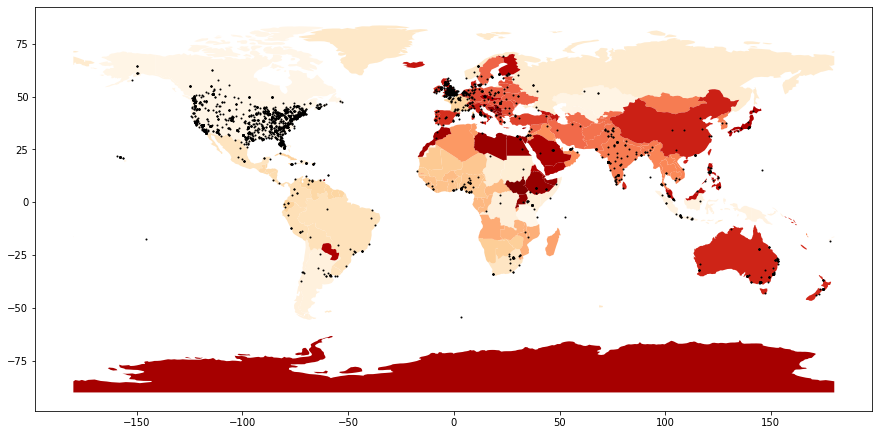

In [8]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

gdf = gp.GeoDataFrame(
    tweets, geometry=gp.points_from_xy(tweets.longitude, tweets.latitude))
ax = gdf.plot(color="k", figsize=(15, 10), zorder=2, markersize=1)

world.plot(ax = ax, figsize=(10, 5), zorder=1, cmap='OrRd')

## Creación de columna color para cada keyword del dataframe existente

In [9]:
tweets["color"] = ""

In [10]:
def generateHexaColor(x):
    return matplotlib.colors.to_hex([rd.random(), rd.random(), rd.random()])

tweetsWithColor = tweets.groupby("keyword").apply(lambda x: generateHexaColor(x)).to_dict()

for index, row in tweets.iterrows():
    if tweetsWithColor[row.keyword] != None:
        tweets.at[index,"color"] = tweetsWithColor[row.keyword]
tweets.head()

,Unnamed: 0,id,keyword,location,text,target,address_latitude_longitude,city,country,latitude,longitude,geometry,color
31,31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,"('Birmingham, West Midlands Combined Authority...",Birmingham,United Kingdom,52.479699,-1.902691,POINT (-1.90269 52.47970),#8fd01d
34,34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,"('Philadelphia, Philadelphia County, Pennsylva...",Philadelphia,United States of America,39.952724,-75.163526,POINT (-75.16353 39.95272),#8fd01d
35,35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,"('London, Greater London, England, SW1A 2DX, U...",London,United Kingdom,51.507322,-0.127647,POINT (-0.12765 51.50732),#8fd01d
36,36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,"('Pretoria, City of Tshwane Metropolitan Munic...",Pretoria,South Africa,-25.745937,28.187944,POINT (28.18794 -25.74594),#8fd01d
37,37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,"('環球大廈 World-Wide House, 中環 Central, 西環 Sai Wa...",環球大廈 World-Wide House,China 中国,22.282303,114.157861,POINT (114.15786 22.28230),#8fd01d


## Visualización de todos los tweets por keyword en base a su longitud y latitud

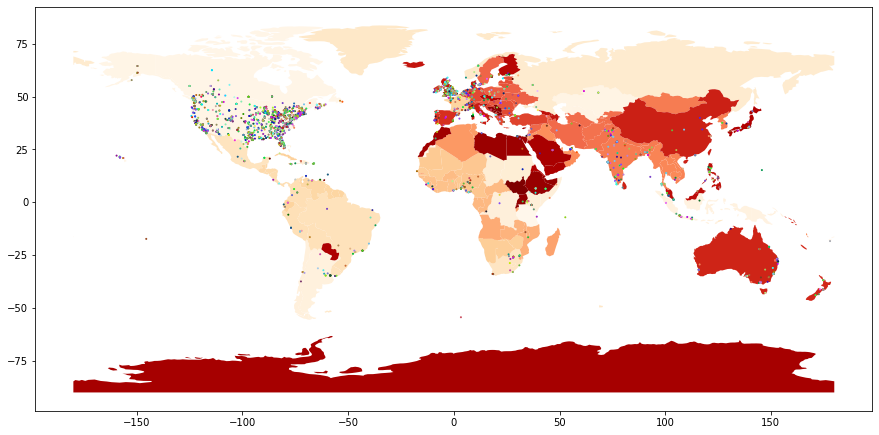

In [11]:
gdf = gp.GeoDataFrame(
    tweets, geometry=gp.points_from_xy(tweets.longitude, tweets.latitude))
ax = gdf.plot(color=gdf["color"], figsize=(15, 10), zorder=2, markersize=1)

world.plot(ax = ax, figsize=(10, 5), zorder=1, cmap='OrRd')

## Visualización de los tweets que están en USA 

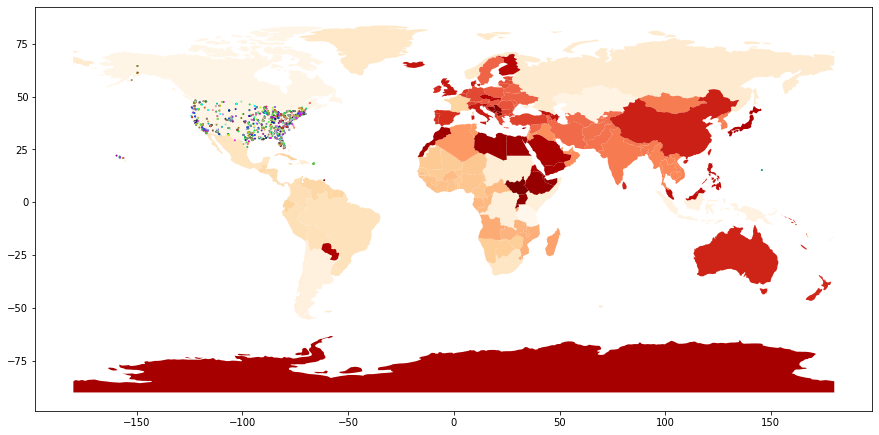

In [12]:
usa = tweets[tweets["country"] == "United States of America"]

usagdf = gp.GeoDataFrame(
    usa, geometry=gp.points_from_xy(usa.longitude, usa.latitude))

ax = usagdf.plot(color=usagdf["color"], zorder=2, figsize=(15, 10), markersize= 1)

world.plot(ax = ax, figsize=(10, 5), zorder=1, cmap='OrRd')

## Ranking de las keywords que tienen tweets con una longitud superior al promedio de longitud de todos los tweets

In [13]:
tweets["keyword"] = tweets["keyword"].str.replace("%20", " ")

In [14]:
tweets["text_length"] = tweets["text"].str.len()

Text(0, 0.5, 'Keyword')

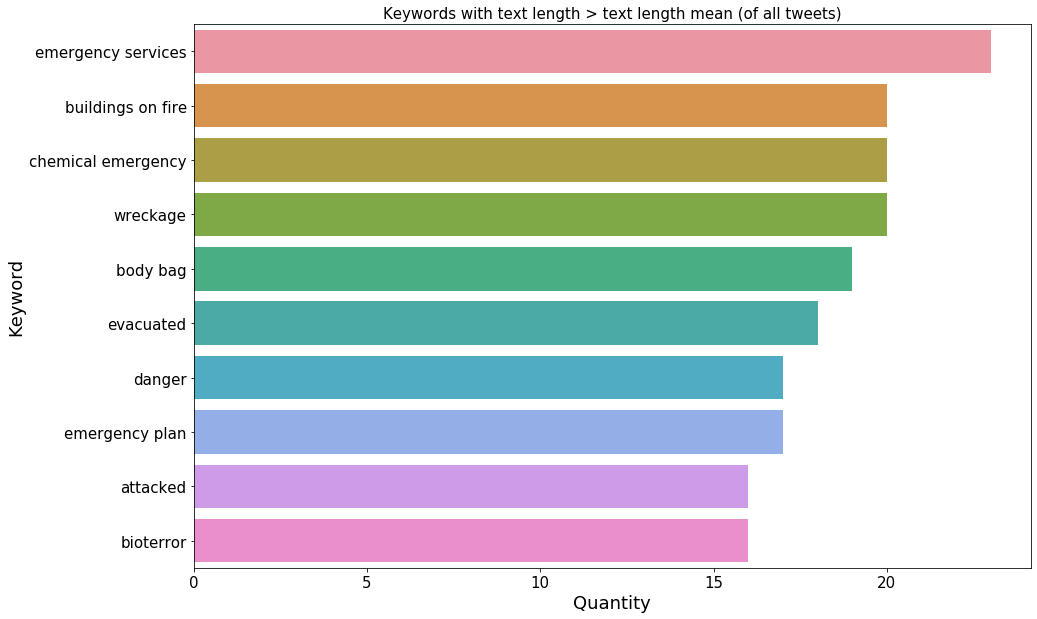

In [15]:
x = tweets.loc[tweets["text_length"] > tweets["text_length"].mean()]

xGroupBy = x.groupby(["keyword"]).agg({"keyword": ["count"]}).reset_index().keyword.nlargest(10, "count")
xGroupBy = xGroupBy.rename(columns={"": "keyword"})
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=xGroupBy["count"], y=xGroupBy["keyword"], orient="h")
g.set_title("Keywords with text length > text length mean (of all tweets)", fontsize=15)
g.set_xlabel("Quantity", fontsize=18)
g.set_ylabel("Keyword", fontsize=18)

## Porcentaje de tweets que tienen N salto de líneas (en este caso 3)

In [16]:
keywords = set()

def hasNNewLines(line, n):
    counter = 0
    for c in line:
        if c == "\n":
            counter += 1
    return counter >= n

for index, row in tweets.iterrows():
    if hasNNewLines(row.text, 3) and not ("http" in row.text):
        keywords.add(row.keyword)

x = tweets.groupby("keyword").count()

percentOfPeopleTryingToSendAPoem = (len(keywords) * 100) / x.shape[0]
percentOfPeopleTryingToSendAPoem # Como puedo plotear este valor ? 

10.407239819004525

## Ranking de keywords donde alguno de sus tweets contienen URLs

Text(0, 0.5, 'Keyword')

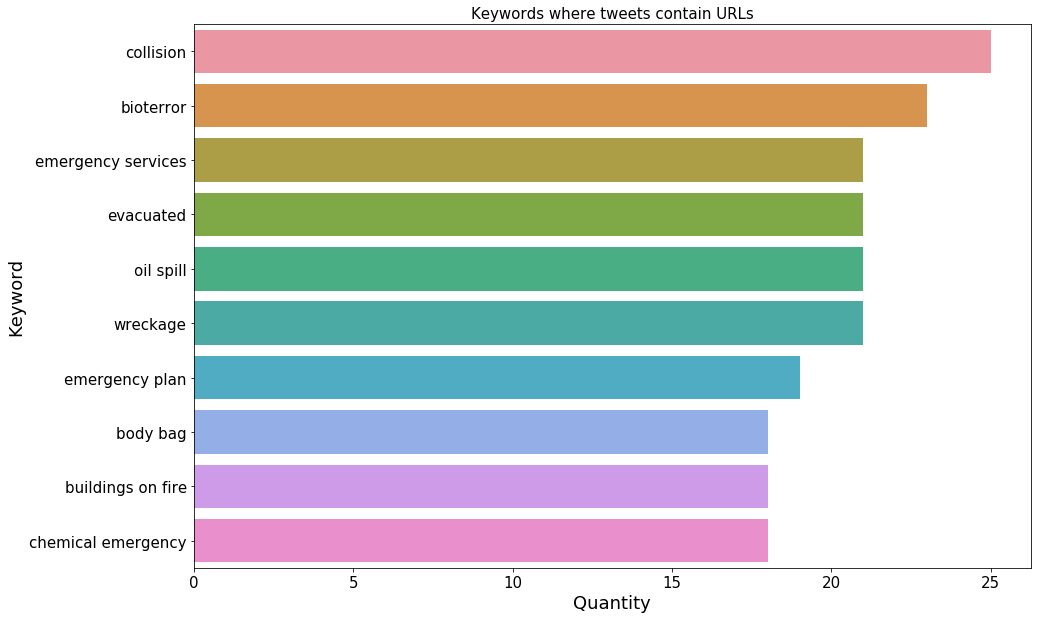

In [17]:
filterBy = tweets["text"].str.contains('http')

textWithURL = tweets[filterBy]
textWithURL = textWithURL.groupby("keyword").count().nlargest(10, "text")
textWithURL.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=textWithURL["text"], y=textWithURL["keyword"], orient="h")
g.set_title("Keywords where tweets contain URLs", fontsize=15)
g.set_xlabel("Quantity", fontsize=18)
g.set_ylabel("Keyword", fontsize=18)

## Ranking de keywords donde alguno de sus tweets contienen tags

Text(0, 0.5, 'Keyword')

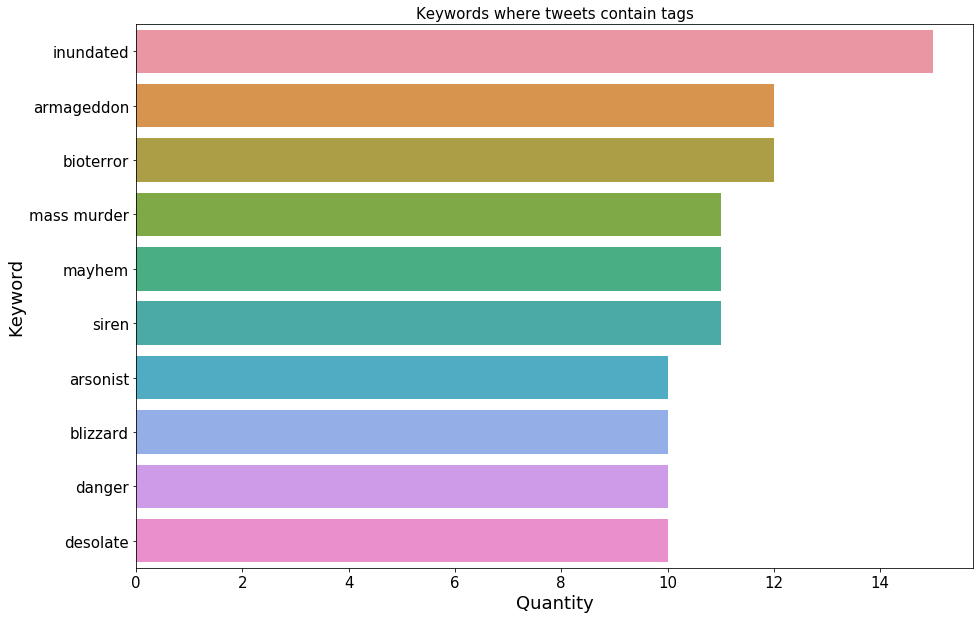

In [18]:
filterByTag = tweets["text"].str.contains("@")

tweetsWithTag = tweets[filterByTag]
tweetsWithTag = tweetsWithTag.groupby("keyword").count().nlargest(10, "text")
tweetsWithTag.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=tweetsWithTag["text"], y=tweetsWithTag["keyword"], orient="h")
g.set_title("Keywords where tweets contain tags", fontsize=15)
g.set_xlabel("Quantity", fontsize=18)
g.set_ylabel("Keyword", fontsize=18)

## Ranking de keywords donde alguno de sus tweets contienen solamente mayúsculas

Text(0, 0.5, 'Keyword')

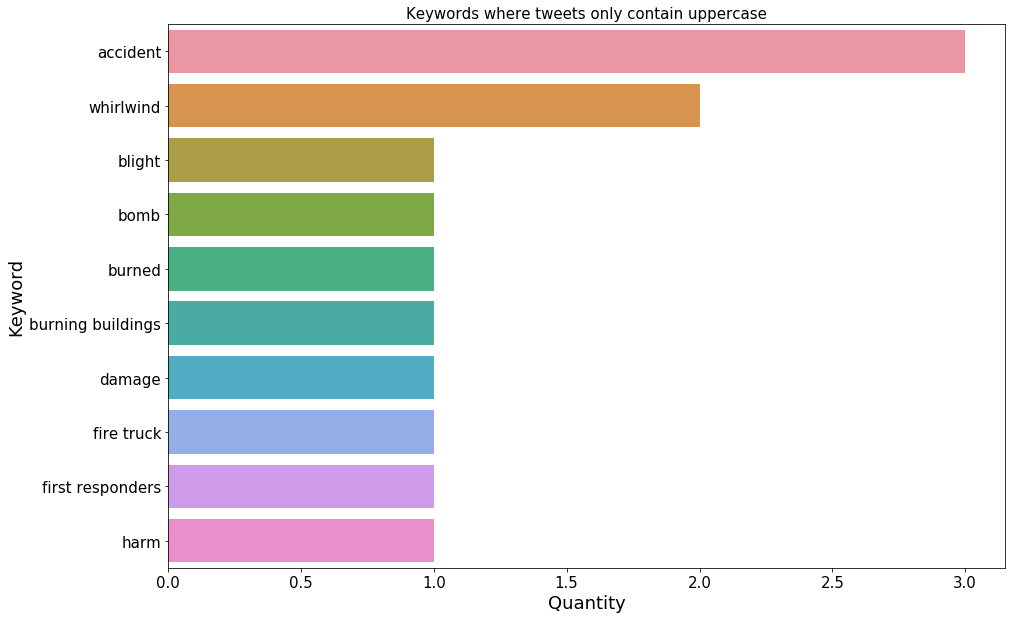

In [19]:
filterByUpper = tweets["text"].str.isupper()

tweetsWithUpper = tweets[filterByUpper]

tweetsWithUpper = tweetsWithUpper.groupby("keyword").count().nlargest(10, "text")
tweetsWithUpper.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=tweetsWithUpper["text"], y=tweetsWithUpper["keyword"], orient="h")
g.set_title("Keywords where tweets only contain uppercase", fontsize=15)
g.set_xlabel("Quantity", fontsize=18)
g.set_ylabel("Keyword", fontsize=18)

## Ranking de keywords donde alguno de sus tweets contienen hashtags

Text(0, 0.5, 'Keyword')

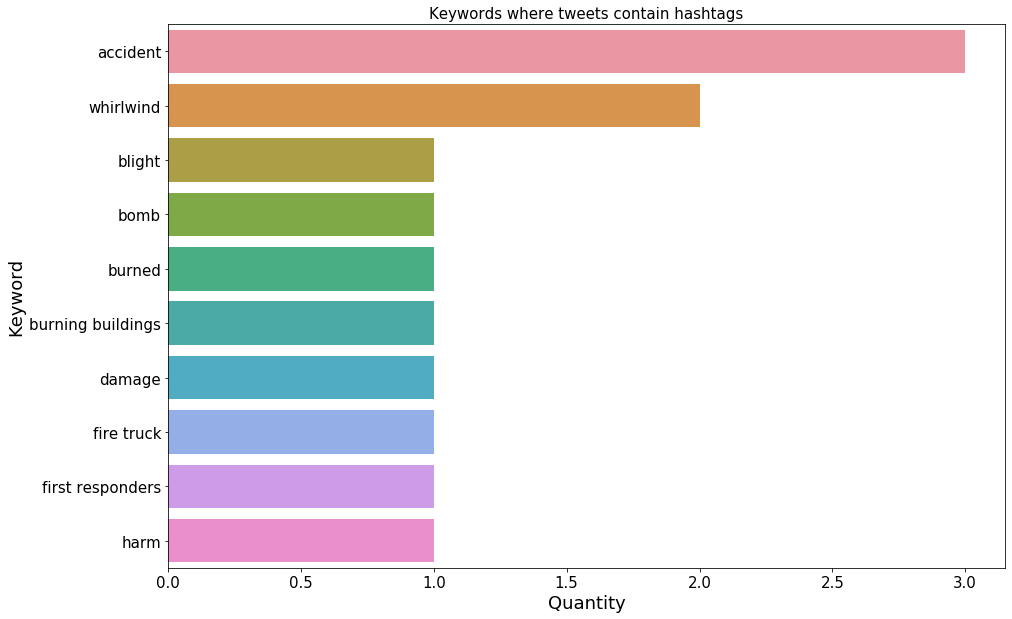

In [20]:
filterByHashtag = tweets["text"].str.contains("#")

tweetsWithHashtag = tweets[filterByHashtag]
tweetsWithHashtag = tweetsWithHashtag.loc[:, ["keyword","text"]].groupby("keyword").count().nlargest(10, "text")
tweetsWithUpper.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=tweetsWithUpper["text"], y=tweetsWithUpper["keyword"], orient="h")
g.set_title("Keywords where tweets contain hashtags", fontsize=15)
g.set_xlabel("Quantity", fontsize=18)
g.set_ylabel("Keyword", fontsize=18)